In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Téléchargement des données

path="../"
data=pd.read_csv("data.csv",sep=",",header=0)
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Analyse exploratoire des données 

### On travaille le jeux de données  

#### 1) Vérifier la nature des différentes variables et leur encodage. 

In [3]:
#Ontransforme nos données en DataFrame
data = pd.DataFrame(data)

#On transforme 'Year' en une variable qualitative
data['Year'] = data['Year'].astype('category')
# il faut aussi transformer Entity en variable qualitative non ?

#On transforme la variable 'Density\\n(P/Km2)' en variable numérique
data['Density\\n(P/Km2)'] = pd.to_numeric(data['Density\\n(P/Km2)'].str.replace(',', ''), errors='coerce')

print(data.dtypes)

Entity                                                                object
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

#### 2. Déterminez le taux de valeurs manquantes pour chaque variable

In [4]:
#Calcul du taux de valeurs manquantes 

Val_Manquante = {}

for col in data.columns: 
    Val_Manquante[col] = data[col].isna().sum()/36.49
        
#print(Val_Manquante)

In [5]:
#suppression des données 
data=data.drop('Renewable-electricity-generating-capacity-per-capita', axis=1)
data=data.drop('Financial flows to developing countries (US $)', axis=1)
data=data.drop('Renewables (% equivalent primary energy)', axis=1)

#### 3. Enlever les individus qui ont des valeurs manquantes 

In [6]:
data = data.dropna() #suppression des individus contenant des valeurs manquantes
#data = data.reset_index(drop=True) #réinitialisation de l'index des lignes
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.939110,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.939110,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,29.50,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38.0,390757.0,-19.015438,29.154857
3644,Zimbabwe,2016,42.561730,29.80,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.80,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.90,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857


In [7]:
data.describe() # equivalent d'un summary sur R

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000
mean,76.584630,62.170084,35.802071,76.693556,15.337019,26.603375,39.629403,26082.456843,5.418111,1.688182e+05,3.895326,12577.050921,228.214784,6.581668e+05,18.140402,12.970486
std,31.510371,39.238548,30.024000,374.419806,78.776075,107.640273,34.454884,37097.457254,3.577415,8.180202e+05,4.645613,18730.476190,742.358140,1.705048e+06,24.924975,65.478645
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,53.237811,22.075000,9.187500,0.290000,0.000000,0.090000,6.091074,2779.966525,3.280000,2.187500e+03,1.770575,1209.802655,31.000000,2.974300e+04,1.650801,-10.940835
50%,97.000000,81.550000,28.790000,2.995000,0.000000,1.680000,35.009718,11922.761000,4.400000,1.042500e+04,3.788166,4168.110171,83.000000,1.319570e+05,17.060816,18.643501
75%,100.000000,100.000000,60.667500,25.787500,0.000000,10.102500,66.879318,31838.556000,6.140000,5.814500e+04,5.957490,14828.344425,206.000000,4.881000e+05,39.399872,43.679291
max,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


In [8]:
print("La taille des données est" , data.shape)

La taille des données est (2868, 18)


In [9]:
colonms = ["Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
           "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
            "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude"]

data.rename(columns=dict(zip(data.columns, colonms)), inplace=True)
data.head()

,Entity,Year,Access_to_elec,Access_to_fuels,Renewable_energy_share,Elec_from_fossils,Elec_from_nuclear,Elec_from_renewables,Low_carbon_elec,Prim_energy_cons,Energy_intensity_level,Value_CO2,Gdp_growth,Gdp_capita,Density,Land_area,Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


### Analyse descriptive unidimentionnelle 

#### Varibales quantitatives

Les données ont des unités très différentes donc il n'est pas pertinant de les comparer entres elles. 

#### 4. Transformation de certaines varibales 

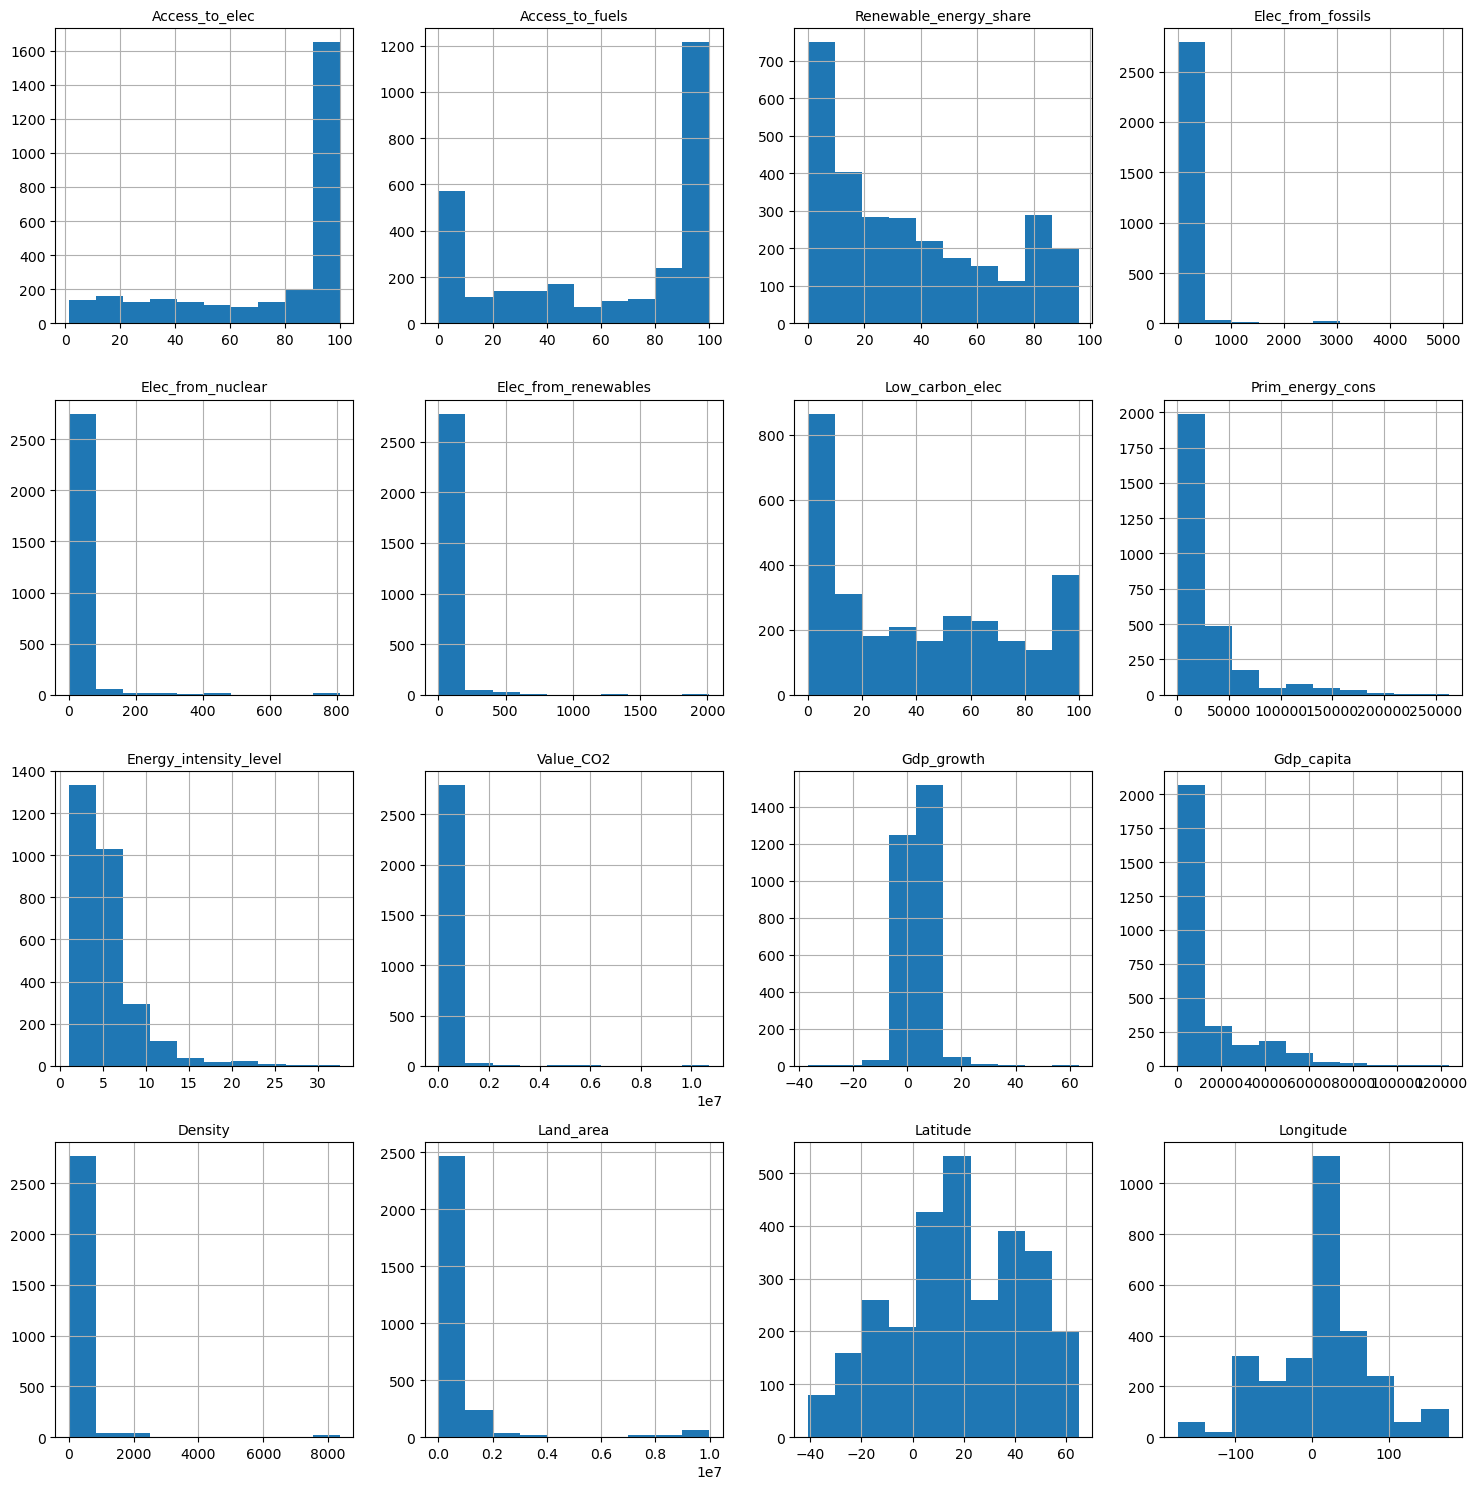

In [10]:
fig ,axs = plt.subplots(4,4, figsize=(15,15)) 

col = data.columns # noms des colonnes
axs = axs.flatten()

for i in range(len(col)-2):
    data[col[i + 2]].hist(ax=axs[i], bins = 10)
    axs[i].set_title(col[i + 2], fontsize=10)

plt.tight_layout()
plt.show()

On va recentrer les variables qui semblent très éparpillées : 
- Electricity from fossil fuels (TWh)                                
- Electricity from nuclear (TWh)                                       
- Electricity from renewables (TWh)  
- Primary energy consumption per capita (kWh/person)                   
- Energy intensity level of primary energy          
- Value_co2_emissions_kt_by_country                                                          
- gdp_per_capita                                                       
- Density\n(P/Km2)
- Land_Area


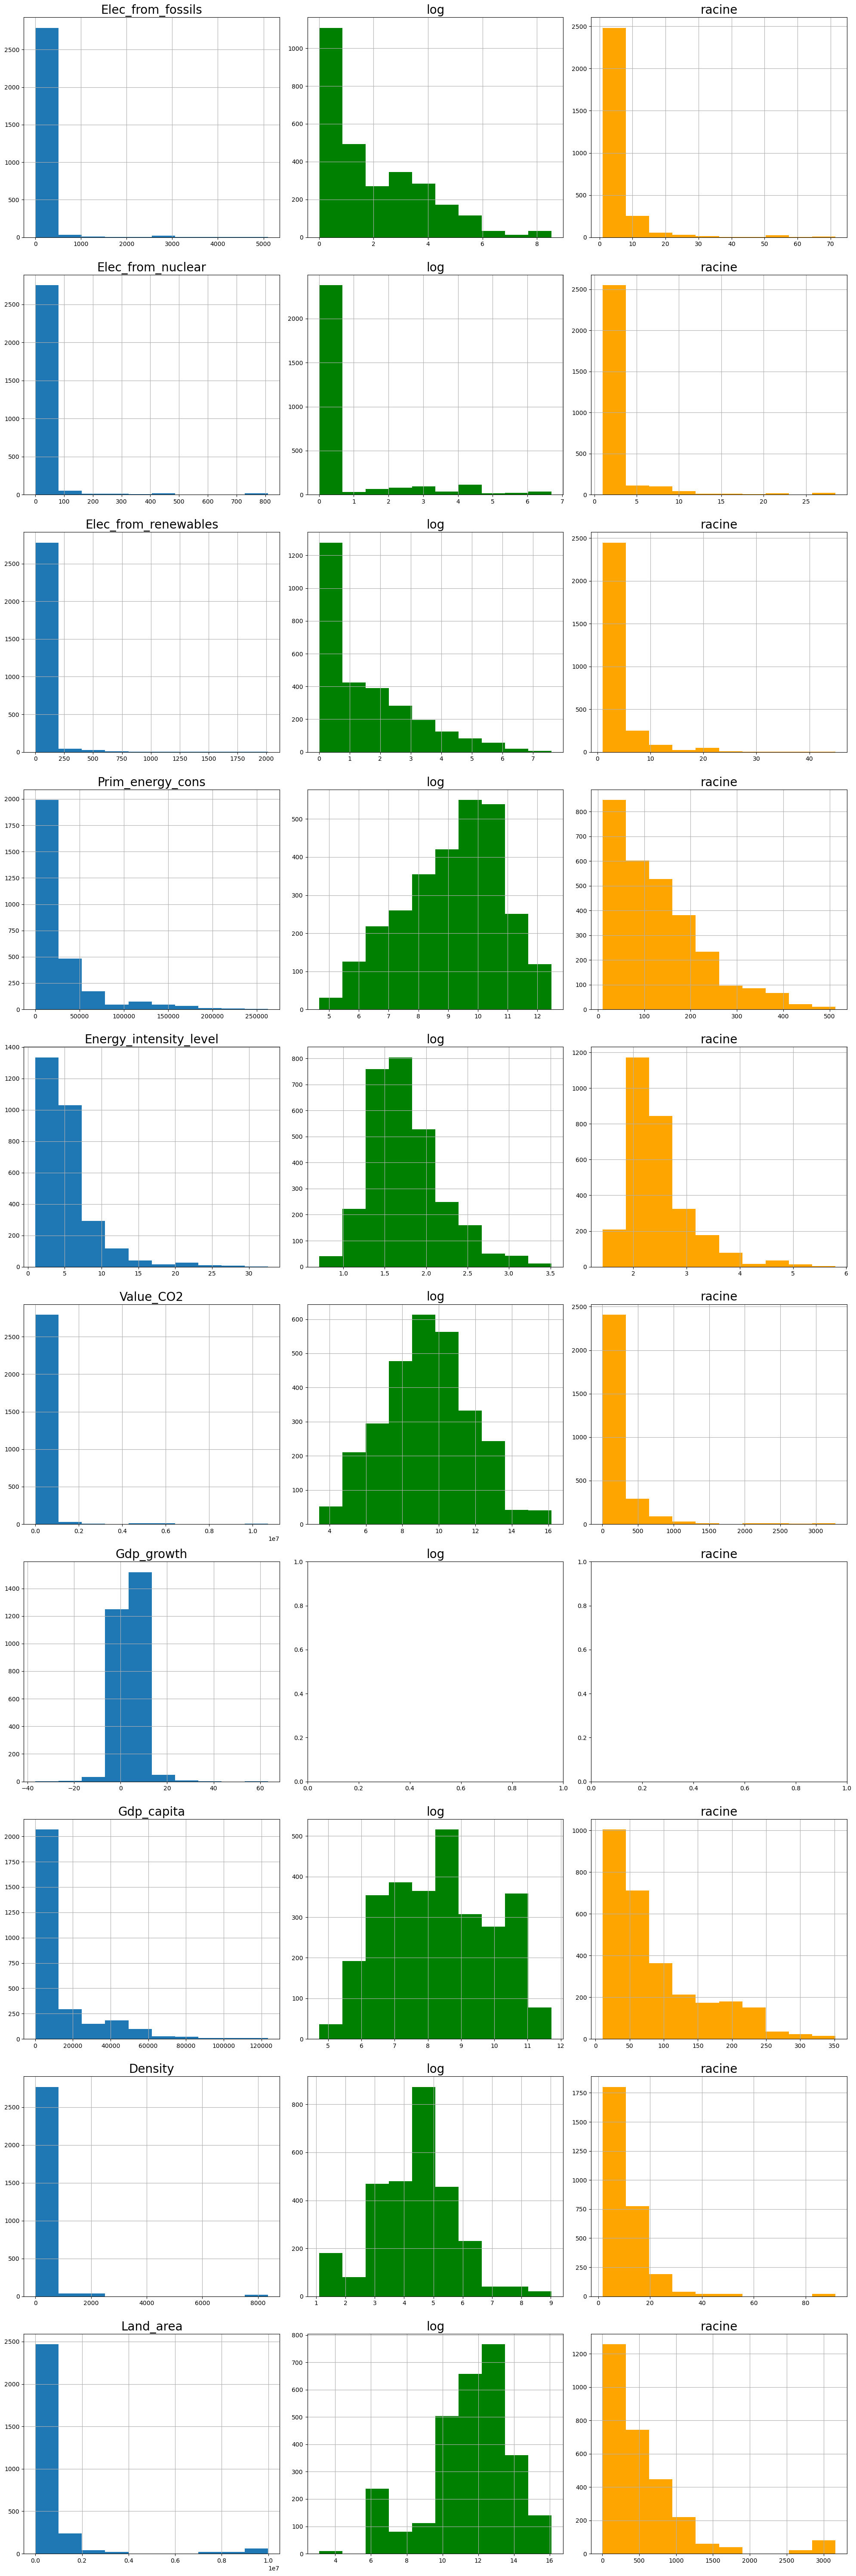

In [11]:
from math import sqrt, log

list_col = list(data.columns)

list_col_a_recentrer =  list_col[5:8] + list_col[9:16] # Enlevons les variables que l'on ne désire pas recentrer 

fig ,axs = plt.subplots(len(list_col_a_recentrer),3, figsize=(20,60)) # prépare pour dessiner la figure


for i,col in enumerate(list_col_a_recentrer):  
    
    data[col].hist(ax=axs[i][0], bins = 10)
    
    if (data[col] >= 0).all():  # Vérifie si toutes les valeurs sont positives
        data[col].map(lambda x: np.log(x+1)).hist(ax=axs[i][1], bins = 10, color='green')
        data[col].map(lambda x: np.sqrt(x+1)).hist(ax=axs[i][2], bins = 10, color='orange')


    axs[i][0].set_title(col, fontsize=20)
    axs[i][1].set_title('log', fontsize=20)
    axs[i][2].set_title('racine', fontsize=20)


plt.tight_layout()
plt.show()


Il sembmle plus interrant de prendre la transformation log qui permet de bien recentrer nos données.  On continuera la suite de l'analyse avec ces modifications. 

In [12]:
data_centre=data # création d'un nouveau tableau avec les valeurs recentrées

list_col = list(data.columns)
list_col_quanti = list_col[2:]
list_var_a_recentrer =  list_col[5:8] + list_col[9:12] + list_col[13:15] # col_r est une liste constituée du nom des variables à recentrer 

for col in list_var_a_recentrer:
    data_centre[col] = data[col].map(lambda x: np.log(x+1))
    data_centre = data_centre.rename(columns={col : 'L_' + col })


data_centre.head()
data_centre.columns.tolist()

['Entity',
 'Year',
 'Access_to_elec',
 'Access_to_fuels',
 'Renewable_energy_share',
 'L_Elec_from_fossils',
 'L_Elec_from_nuclear',
 'L_Elec_from_renewables',
 'Low_carbon_elec',
 'L_Prim_energy_cons',
 'L_Energy_intensity_level',
 'L_Value_CO2',
 'Gdp_growth',
 'L_Gdp_capita',
 'L_Density',
 'Land_area',
 'Latitude',
 'Longitude']

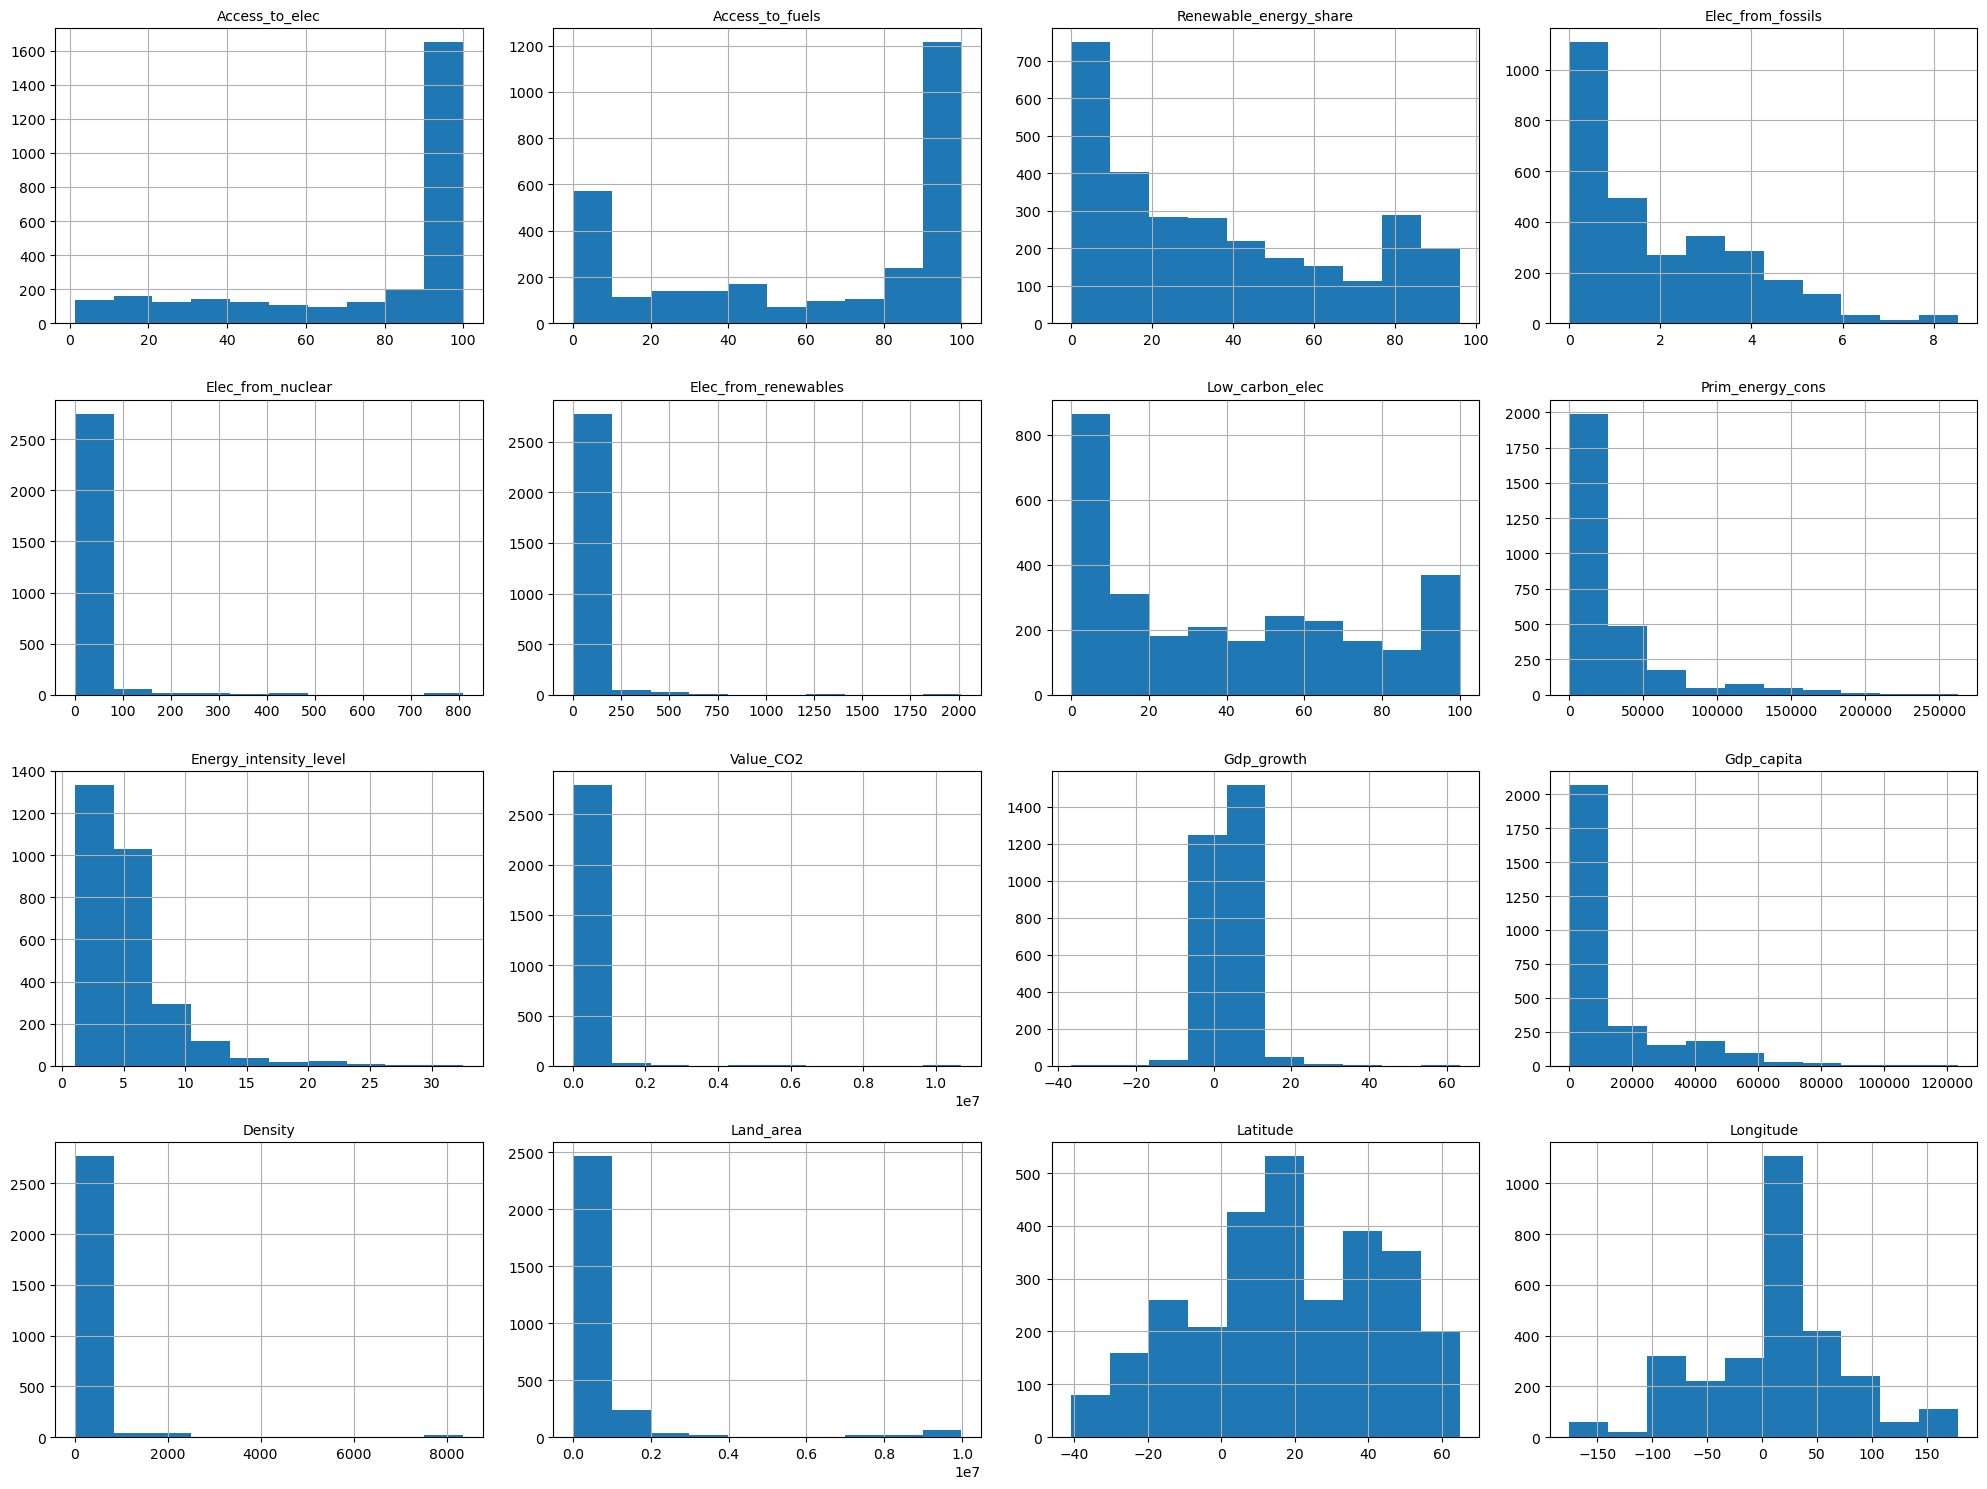

In [13]:
list_col = list(data.columns)
list_col_quanti = list_col[2:]

fig ,axs = plt.subplots(4,4, figsize=(20,15)) # prépare pour dessiner la figure
axs = axs.flatten()

for i,col in enumerate(list_col_quanti):
    data[col].hist(ax=axs[i], bins = 10)
    axs[i].set_title(col, fontsize=10)

plt.tight_layout()
plt.show()

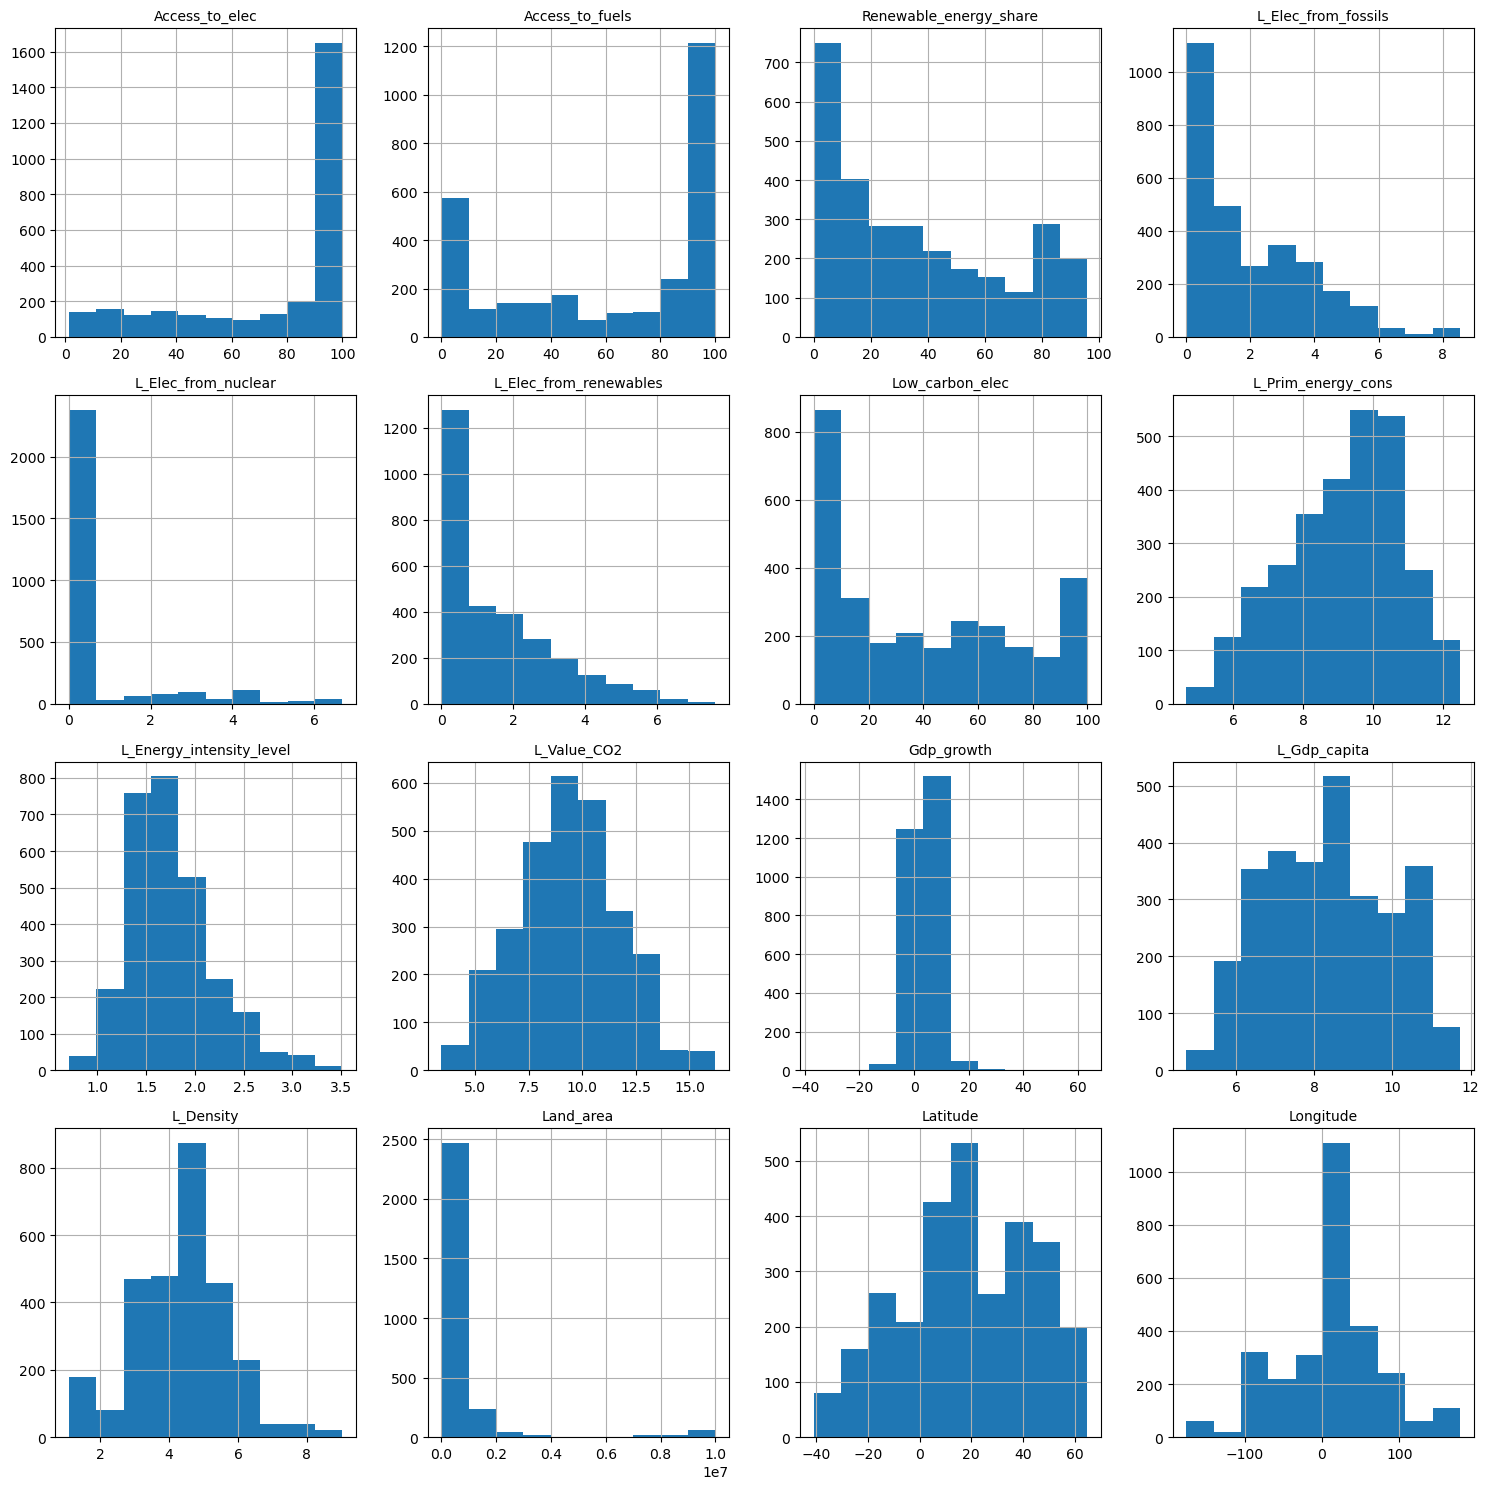

In [14]:
fig2 ,axs2 = plt.subplots(4,4, figsize=(15,15)) 

col2 = data_centre.columns
axs2 = axs2.flatten()

for i in range(len(col2) - 2):
    data_centre[col2[i + 2]].hist(ax=axs2[i])
    axs2[i].set_title(col2[i + 2], fontsize=10)

plt.tight_layout()
plt.show()

Idée : Affichage du CO2 en fonction de la localisation du pays (voir ADD) scatter map 

#####  Variables qualitatives 

In [15]:
#Nombre d'années de relevé par Pays 

Pays_valeurs = data.Entity.value_counts()
print(Pays_valeurs)
print('')

Entity
Lesotho            20
North Macedonia    20
Nepal              20
Netherlands        20
New Zealand        20
                   ..
Eritrea            12
Nauru              10
Djibouti            6
Somalia             6
South Sudan         3
Name: count, Length: 148, dtype: int64



Etant donné qu'on a enlevé des lignes qui avaient des valeurs manquantes, il sera important de prendre en compte que certains pays ont des relevés sur moins d'années. 

#### 5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays

In [16]:
#On créer un tableau avec la moyenne pour chaque pays de l'emission en CO2
# on reprend data car on veut Value_CO2 sans le log
data_np = data.to_numpy()
Moy_Pays_CO2 = []
ind=0
Moy_Pays_CO2.append(data_np[0][11])
Pays = []
Pays.append(data_np[0][0])

for i in range(data_np.shape[0] -1) : 
    if data_np[i+1][0]== data_np[i][0] : 
        Moy_Pays_CO2[ind]+= data_np[i+1][11]
    else : 
        Moy_Pays_CO2[ind] = Moy_Pays_CO2[ind]/Pays_valeurs[data_np[i][0]] #moyenne de la somme de CO2 produite sur les années de prélèvement 
        Moy_Pays_CO2.append(data_np[i+1][11])
        Pays.append(data_np[i+1][0])
        ind+=1


{'whiskers': [<matplotlib.lines.Line2D at 0x137cca290>,
 'caps': [<matplotlib.lines.Line2D at 0x13778c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x136cf3990>],
 'medians': [<matplotlib.lines.Line2D at 0x13778c490>],
 'fliers': [<matplotlib.lines.Line2D at 0x13778c5d0>],
 'means': []}

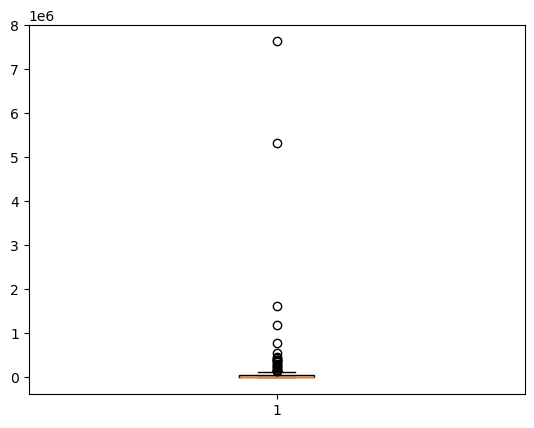

In [17]:
#Affichage de la valeur CO2 
plt.boxplot(Moy_Pays_CO2)

Héterogénéité flagrante avec les points outliers. 

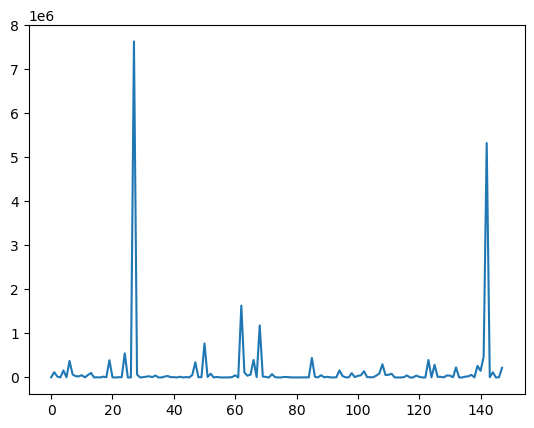

In [18]:
plt.plot(Moy_Pays_CO2)

In [19]:
#CO2 pour chaque pays 
CO2_Pays = dict(zip(Pays, Moy_Pays_CO2))
CO2_Pays_trie = dict(sorted(CO2_Pays.items(), key=lambda item: item[1], reverse=True))
print('Les 5 pays produisant le plus de CO2 en cummulé sont :')

for Pays, Moy_Pays_CO2 in list(CO2_Pays_trie.items())[:5]:
    print(f"{Pays}: {Moy_Pays_CO2} ")
#CO2_trie = np.sort(CO2)[::-1]


Les 5 pays produisant le plus de CO2 en cummulé sont :
China: 7636642.46335 
United States: 5329538.5342 
India: 1633978.99966 
Japan: 1183734.48525 
Germany: 773644.502685 


### Analyse descriptive multidimentionnelle 

#### 6. Analyse des dépendances entre les variables quantitatives.

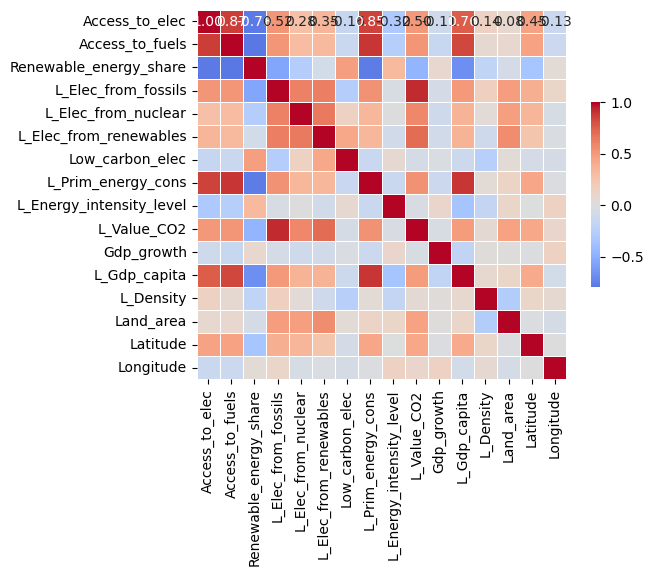

In [20]:
import seaborn as sns
# Calculer la matrice de corrélation
data_corr = data_centre[["Access_to_elec","Access_to_fuels","Renewable_energy_share","L_Elec_from_fossils","L_Elec_from_nuclear","L_Elec_from_renewables","Low_carbon_elec","L_Prim_energy_cons","L_Energy_intensity_level","L_Value_CO2","Gdp_growth","L_Gdp_capita","L_Density","Land_area","Latitude","Longitude"]]

corr_matrix = data_corr.corr()

# Tracer la heatmap de corrélation avec des ellipses de confiance
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=None, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Afficher le graphique
plt.show()

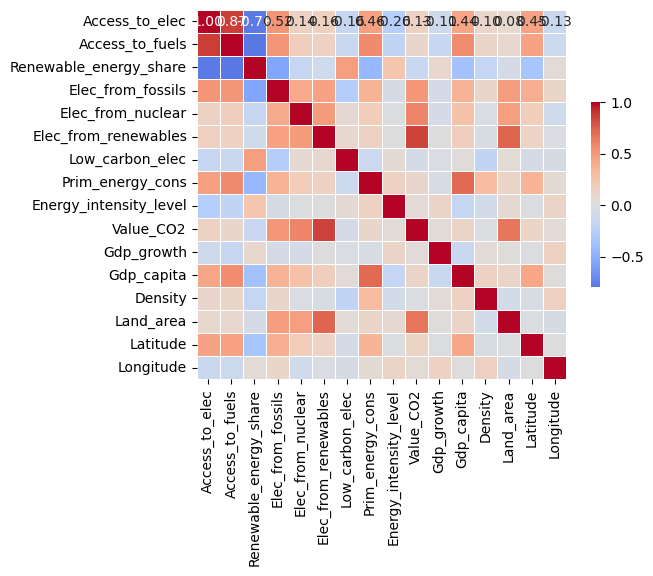

In [21]:
import seaborn as sns
# Calculer la matrice de corrélation
data_corr = data[["Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils","Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level","Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude"]]

corr_matrix = data_corr.corr()

# Tracer la heatmap de corrélation avec des ellipses de confiance
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=None, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Afficher le graphique
plt.show()

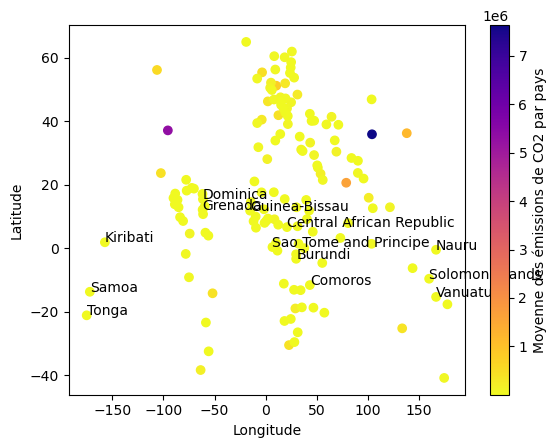

In [22]:
import matplotlib.cm as cm
# print(list(CO2_Pays_trie.values()))
data_CO2_2D = {'Pays':list(CO2_Pays_trie.keys()) ,
        'Moy_Pays_CO2': list(CO2_Pays_trie.values())}

data_CO2_2D = pd.DataFrame(data_CO2_2D)
for Pays in list(CO2_Pays_trie.keys()):
    index = data_CO2_2D.index[data_CO2_2D["Pays"] == Pays]
    data_CO2_2D.loc[index,"Longitude"]=data_centre[data_centre["Entity"] == Pays]["Longitude"].iloc[0]
    data_CO2_2D.loc[index,"Latitude"]=data_centre[data_centre["Entity"] == Pays]["Latitude"].iloc[0]

# print(data_centre[data_centre["Entity"] == "China"]["Longitude"].iloc[0])
# print(data_CO2_2D)

plt.scatter(data_CO2_2D.Longitude, data_CO2_2D.Latitude, c=data_CO2_2D["Moy_Pays_CO2"], cmap=cm.plasma_r)

# Ajouter des étiquettes pour chaque pays
for x, y, pays, moyenne_CO2 in zip(data_CO2_2D.Longitude, data_CO2_2D.Latitude, data_CO2_2D.Pays, data_CO2_2D["Moy_Pays_CO2"]):
    if moyenne_CO2 <= 4e+02:
        plt.text(x, y, pays)

# Ajouter une barre de couleur
plt.colorbar(label='Moyenne des émissions de CO2 par pays')

# Ajouter des labels d'axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher le graphique
plt.show()

### Analyse en composantes principales 

#### 7. ACP 

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix

[[-3.16822151  0.06101093  0.2871494  ...  0.27635793  0.00967332
  -0.93284408]
 [-3.03602242  0.01321807 -0.35446284 ...  0.15730606  0.0332615
  -1.00382091]
 [-2.93387881 -0.07676561  0.46540682 ...  0.19378711 -0.11981548
  -0.83245589]
 ...
 [-2.60481884  1.1121645   0.11996624 ... -0.04774503  0.05709337
  -0.03632479]
 [-2.48987213  1.18194571  0.15834991 ... -0.01778398  0.05247674
   0.0392283 ]
 [-2.36812317  1.14714954 -0.60785078 ... -0.05445961 -0.00617941
   0.01767015]]


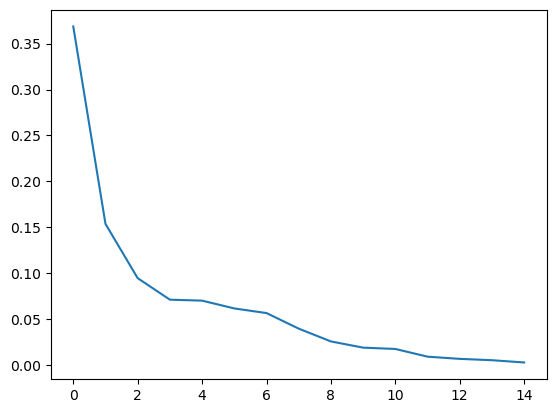

In [24]:
data_scaled=scale(data_centre[data_centre.columns[2:18]])

new_data = np.delete(data_scaled,9,axis=1)

acp = PCA()

data_acp = acp.fit_transform(new_data)

data_acp = np.hstack((data_acp, data_scaled[:, 9][:, np.newaxis]))

print(data_acp)

plt.plot(acp.explained_variance_ratio_)
plt.show()

Il semble difficil d'identifier le coude, 2 dimensions semble peu probable. Voyant les variances cumulées. 

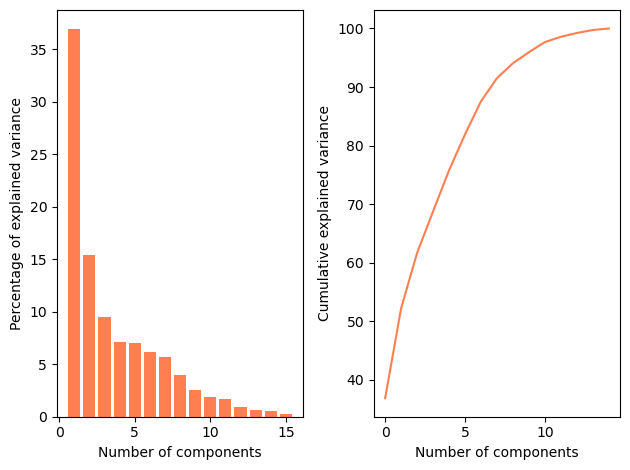

Varianceexpliquée par les 7 premières composentes: 87.57


In [25]:
# %load solutions/pca/pca_components.py
explained_variance_ratio = 100*acp.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 15
x = np.arange(1, n_bars + 1)
plt.bar(x, explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

plt.tight_layout()
plt.show()
print("Varianceexpliquée par les 7 premières composentes:", round(sum([explained_variance_ratio[i] for i in range(7)]),2))

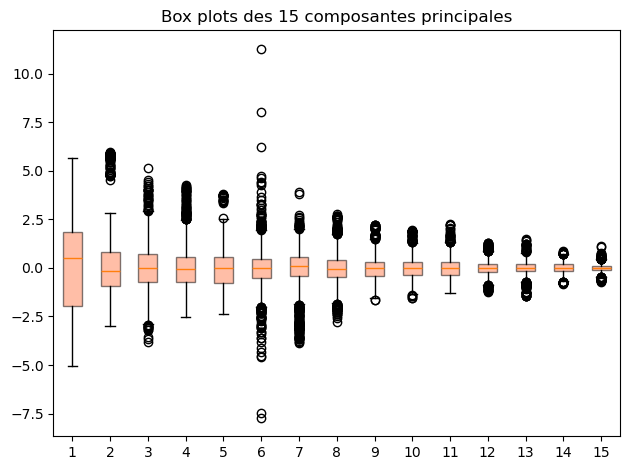

In [26]:
box = plt.boxplot(data_acp[:,:15], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots des 15 composantes principales")
plt.tight_layout()
plt.show()

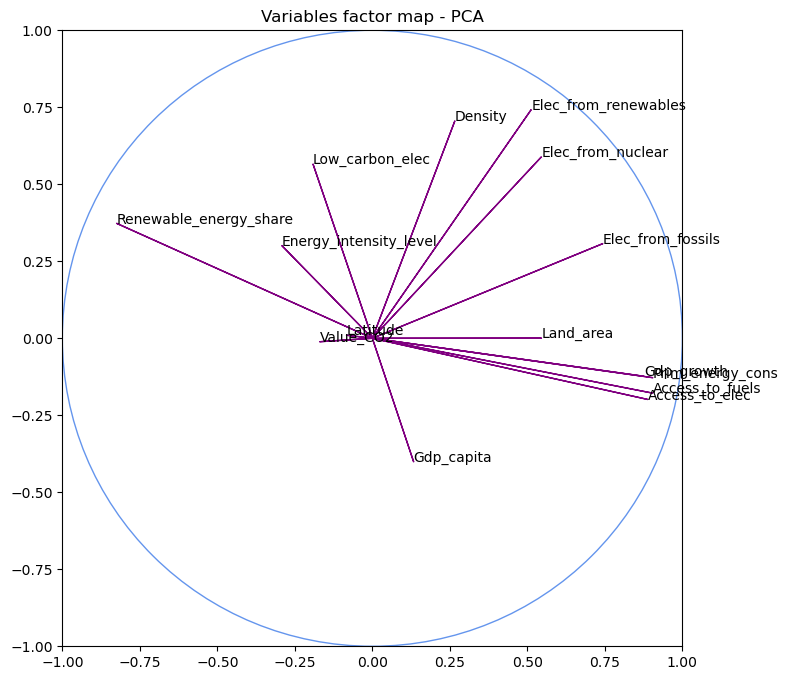

In [27]:
coord1 = acp.components_[0] * np.sqrt(acp.explained_variance_[0])
coord2 = acp.components_[1] * np.sqrt(acp.explained_variance_[1])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data.columns[2:]):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.show()

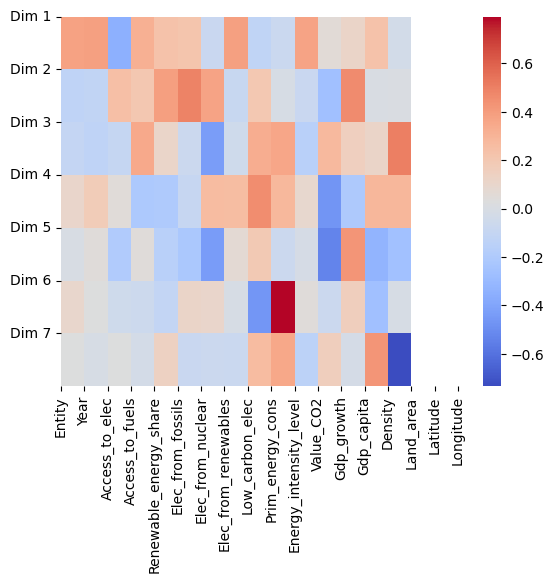

In [28]:
import seaborn as sns

heatmap = sns.heatmap(acp.components_[:7], annot=False, cmap='coolwarm')
plt.yticks(ticks=range(7), labels=['Dim {}'.format(i+1) for i in range(7)], rotation=0)
plt.xticks(ticks=range(len(data.columns)), labels=data.columns, rotation=90)
plt.show()

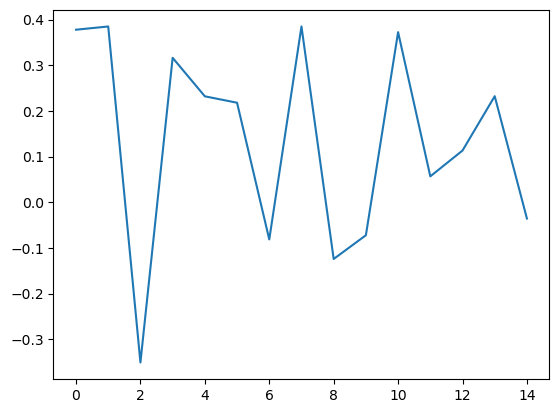

In [29]:
#Tendances de la dimension 1

plt.plot(acp.components_[0])
# n_steps = loading.shape[1]
# time    = np.linspace(1,n_steps,8)



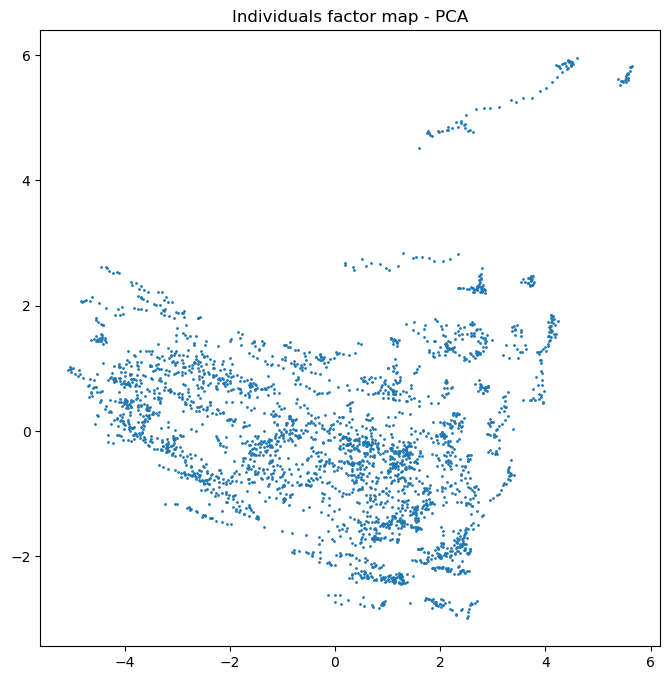

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(data_acp[:, 0], data_acp[:, 1], s=1, linewidths=1)
plt.title("Individuals factor map - PCA")
plt.show()

Au final on va continuer l'analyse en se restreignant à 7 composantes. 

In [31]:
data_reduit = data_acp[:,:7]

#### 8) Visualiser la dépendence de la varibale 'Year' et de la varibale à prédire

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Difference entre 2000 et 2020 :  0.3738180373038201


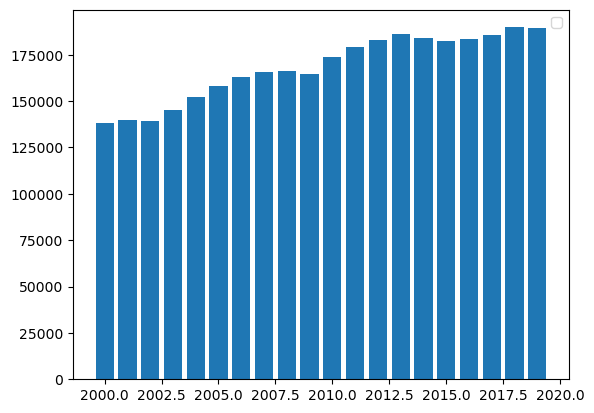

In [32]:
#faire une moyenne du CO2 sur les années et plot 
#On créer un tableau avec la moyenne pour chaque année de l'emission en CO2
# on reprend data car on veut Value_CO2 sans le log

Annee_valeurs = data.Year.value_counts()
Annee_valeurs_trie = Annee_valeurs.sort_index()
Annee_valeurs_trie = Annee_valeurs_trie[:-1]
Annee_index = Annee_valeurs_trie.index
# print(Annee_valeurs_trie[2000])

data_np = data.to_numpy()
Moy_Annees_CO2=[]
for i in Annee_index:
    subset = data_np[data_np[:, 1] == i]
    if Annee_valeurs_trie[i] !=0 :
        Moy_Annees_CO2.append(np.sum(subset[:,11])/Annee_valeurs_trie[i])

# print(Moy_pays_CO2)
# print(len(Moy_pays_CO2))
print("Difference entre 2000 et 2020 : ", (Moy_Annees_CO2[-1] - Moy_Annees_CO2[0])/Moy_Annees_CO2[0])
plt.bar(Annee_index,Moy_Annees_CO2)
plt.legend()


On observe une augmentation de CO2 au fur et à mesure des années. 
Entre 2020 et 2000, on observe une augmentation de 37,38%

# Modélisation de la variable Value_CO2

### Création des échantillons test et apprentissage

In [33]:
from sklearn.model_selection import train_test_split

# dataDum=pd.get_dummies(data_centre[["Entity","Year"]])
dataQuant=data_centre[["Access_to_elec","Access_to_fuels","Renewable_energy_share","L_Elec_from_nuclear","L_Elec_from_renewables","Low_carbon_elec","L_Prim_energy_cons","L_Energy_intensity_level","Gdp_growth","L_Gdp_capita","L_Density","Land_area","Latitude","Longitude"]]

#dfC=pd.concat([dataDum,dataQuant],axis=1)

CO2 = data_centre["L_Value_CO2"]
X_train, X_test, CO2_train, CO2_test = train_test_split(dataQuant,CO2,test_size=0.2, random_state=11)
# print(np.shape(X_train)) taille 2294 = 80% * 2868
# print(np.shape(X_test)) taille 574 = 20% * 2868

In [34]:
from sklearn.preprocessing import StandardScaler
# il est important de normaliser les données pour certains modèles tels que :
# SVM, modèles avec pénalisation, réseaux de neurones...
scaler = StandardScaler()
scaler.fit(X_train)
Xr_train = scaler.transform(X_train)
# pareil sur les données test
Xr_test = scaler.transform(X_test)

## Prévision par modèles linéaires

### 1) Régression linéaire simple

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

reg_lin =  LinearRegression()
reg_lin.fit(Xr_train, CO2_train)

CO2_pred_lin = reg_lin.predict(Xr_test)

MSE = mean_squared_error(CO2_test,CO2_pred_lin)
R2 = r2_score(CO2_test,CO2_pred_lin)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2 = 1 - ((1 - R2) * (n - 1) / (n - p - 1))

# Résidus
residuals_lin = CO2_test - CO2_pred_lin

### 2) Régression linéaire avec les termes quadratiques

In [124]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
Xr_train_poly = poly.fit_transform(Xr_train)

reg_lin_2 = LinearRegression()
reg_lin_2.fit(Xr_train_poly, CO2_train)

poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)
coefficients = pd.DataFrame({'Variable': poly_feature_names, 'Coefficient': reg_lin_2.coef_})
print(coefficients)

Xr_test_2 = poly.transform(Xr_test)

CO2_pred_2 = reg_lin_2.predict(Xr_test_2)

MSE_2 = mean_squared_error(CO2_test,CO2_pred_2)
R2_2 = r2_score(CO2_test,CO2_pred_2)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_2 = 1 - ((1 - R2_2) * (n - 1) / (n - p - 1))

# Résidus :
residuals_lin_2 = CO2_test - CO2_pred_2

                   Variable   Coefficient
0                         1  1.533550e-15
1            Access_to_elec  6.133247e-01
2           Access_to_fuels -3.118627e-01
3    Renewable_energy_share  6.669955e-01
4       L_Elec_from_nuclear -4.399802e-01
..                      ...           ...
115      Land_area Latitude  5.515260e-01
116     Land_area Longitude  4.962142e-01
117              Latitude^2  5.451040e-03
118      Latitude Longitude  1.926567e-01
119             Longitude^2 -1.981814e-01

[120 rows x 2 columns]


### 3) Régression avec pénalisation Lasso

Avec la méthode Lasso, le but est de minimiser : $\frac{1}{2n_{samples}}||y - Xw||^2_2 + \alpha||w||_1$

Ici, on va faire varier le paramètre alpha qui se trouve devant la pénalité l1. Mettre alpha = 0 revient à réaliser une méthode de moindres carrés. 

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param=[{"alpha":[0.001,0.005,0.01,0.02,0.05]}]

reg_lasso = Lasso(max_iter=10000)
reg_lasso = GridSearchCV(estimator=reg_lasso,param_grid=param, cv=10)

regOpt_lasso = reg_lasso.fit(Xr_train,CO2_train)

best_lasso = regOpt_lasso.best_estimator_

print("Meilleur paramètre alpha:", regOpt_lasso.best_params_["alpha"])

CO2_pred_lasso = regOpt_lasso.predict(Xr_test)

MSE_lasso = mean_squared_error(CO2_test, CO2_pred_lasso)
R2_lasso = r2_score(CO2_test,CO2_pred_lasso)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_lasso = 1 - ((1 - R2_lasso) * (n - 1) / (n - p - 1))

# Résidus :
residuals_lasso = CO2_test - CO2_pred_lasso

Meilleur paramètre alpha: 0.005


In [144]:
# Coefficients
coef = pd.Series(best_lasso.coef_, index=X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 13 variables et en supprime 1


In [145]:
print("----- Les variables que Lasso a supprimé -----")
print("")
print(coef[coef==0])
print("")
print("----- Les variables qui ont le plus de poids dans le modèles Lasso -----")
print("")
print(coef[abs(coef)>0.2])

----- Les variables que Lasso a supprimé -----

L_Prim_energy_cons   -0.0
dtype: float64

----- Les variables qui ont le plus de poids dans le modèles Lasso -----

Access_to_elec             -0.259109
Access_to_fuels             0.331856
Renewable_energy_share     -0.628021
L_Elec_from_renewables      1.693210
Low_carbon_elec            -0.515718
L_Energy_intensity_level    0.260030
Latitude                    0.289134
Longitude                   0.269657
dtype: float64


### Régression quadratique avec pénalisation lasso

In [170]:
from sklearn.pipeline import make_pipeline

column_names = X_train.columns.tolist()
column_names_poly = ['1'] + column_names  # Ajouter le biais
column_names_poly += [f"{col}^2" for col in column_names]  # Ajouter les termes quadratiques
column_names_poly += [f"{col1}*{col2}" for i, col1 in enumerate(column_names) for col2 in column_names[i+1:]]  # Ajouter les termes d'interaction
column_names_poly = np.array(column_names_poly)

param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0]  # Valeurs à tester pour le paramètre de régularisation alpha
    }


lasso_model2 = make_pipeline(PolynomialFeatures(degree=2), Lasso(max_iter=10000))

grid_search = GridSearchCV(lasso_model2, param_grid, cv=5, scoring='neg_mean_squared_error')

lasso_Opt2 = grid_search.fit(Xr_train, CO2_train)

best_alpha = lasso_Opt2.best_params_['lasso__alpha']
print("Meilleur paramètre alpha:", best_alpha)

best_model = lasso_Opt2.best_estimator_
CO2_pred_lasso2 = best_model.predict(Xr_test)


MSE_lasso2 = mean_squared_error(CO2_test, CO2_pred_lasso2)
R2_lasso2 = r2_score(CO2_test,CO2_pred_lasso2)

#n = len(CO2_test)
#p = Xr_test.shape[1]
#adjusted_R2_lasso = 1 - ((1 - R2_lasso) * (n - 1) / (n - p - 1))

# Résidus :
residuals_lasso2 = CO2_test - predictions

Meilleur paramètre alpha: 0.001


In [171]:
# Coefficients
# Afficher les coefficients non nuls
coef = best_model.named_steps['lasso'].coef_
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 110 variables et en supprime 10


In [172]:
print("----- Les variables que Lasso a supprimé -----")
print("")
selected_features = np.array(column_names_poly)[np.where(np.abs(coef) == 0)]
print(selected_features)
print("")
print("----- Les variables qui ont le plus de poids dans le modèles Lasso -----")
print("")
selected_features = np.array(column_names_poly)[np.where(np.abs(coef) > 0.7)]
print(selected_features)

----- Les variables que Lasso a supprimé -----

['1' 'L_Elec_from_nuclear^2' 'Land_area^2'
 'Access_to_elec*L_Prim_energy_cons' 'Access_to_elec*Land_area'
 'L_Elec_from_nuclear*L_Prim_energy_cons'
 'L_Elec_from_nuclear*L_Gdp_capita'
 'Low_carbon_elec*L_Energy_intensity_level' 'Low_carbon_elec*L_Density'
 'L_Prim_energy_cons*Land_area']

----- Les variables qui ont le plus de poids dans le modèles Lasso -----

['L_Elec_from_renewables' 'L_Prim_energy_cons' 'L_Density' 'Land_area'
 'Access_to_fuels^2' 'Access_to_elec*Low_carbon_elec'
 'Access_to_elec*L_Gdp_capita' 'Access_to_fuels*Land_area'
 'L_Elec_from_renewables*Land_area' 'Low_carbon_elec*L_Gdp_capita'
 'Low_carbon_elec*Land_area' 'L_Gdp_capita*Land_area']


### 4) Régression avec pénalisation Ridge

Dans ce modèle, notre but est de minimiser cette fonction : $||y - Xw||^2_2 + \alpha||w||^2_2$.
On va donc chercher à optimiser le paramètre alpha qui se trouve devant le terme de pénalisation l2. 

In [142]:
from sklearn.linear_model import Ridge

param=[{"alpha":[0.01,0.05,0.07,0.1,1,5,10]}] 

reg_ridge = Ridge()
reg_ridge = GridSearchCV(estimator=reg_ridge,param_grid=param, cv=10)

regOpt_ridge = reg_ridge.fit(Xr_train,CO2_train)

best_ridge = regOpt_ridge.best_estimator_

print("Meilleur paramètre alpha:", regOpt_ridge.best_params_["alpha"])

CO2_pred_ridge = regOpt_ridge.predict(Xr_test)

MSE_ridge = mean_squared_error(CO2_test, CO2_pred_ridge)
R2_ridge = r2_score(CO2_test,CO2_pred_ridge)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_ridge = 1 - ((1 - R2_ridge) * (n - 1) / (n - p - 1))

# Résidus 
residuals_ridge = CO2_test - CO2_pred_ridge

Meilleur paramètre alpha: 5


### Comparaison des modèles de régression

 ----- Comparaison des MSE ----- 
MSE quadratique =  0.435072476147789
MSE Lasso quadratique =  0.4366827721308322
 ----- Comparaison des R2 ----- 
R2 quadratique =  0.9181775925022084
R2 Lasso Quadratique =  0.9178747503291452


/var/folders/gn/sy_p6gyd0s15vprgs70pb0dr0000gn/T/ipykernel_72708/1822130559.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(ind,rotation=45)
/var/folders/gn/sy_p6gyd0s15vprgs70pb0dr0000gn/T/ipykernel_72708/1822130559.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(ind,rotation=45)


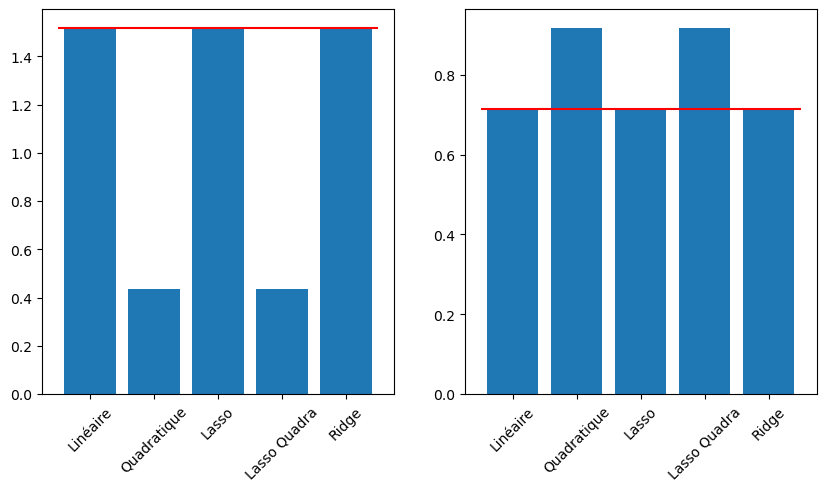

In [173]:
print(" ----- Comparaison des MSE ----- ")
# print("MSE = ", MSE)
print("MSE quadratique = ", MSE_2)
# print("MSE Lasso = ", MSE_lasso)
# print("MSE Ridge = ",MSE_ridge)
print("MSE Lasso quadratique = ",MSE_lasso2)
# print("")
# print("")

print(" ----- Comparaison des R2 ----- ")
#print("R2 = ",R2)
print("R2 quadratique = ",R2_2)
#print("R2 Lasso = ",R2_lasso)
#print("R2 Ridge = ",R2_ridge)
print("R2 Lasso Quadratique = ",R2_lasso2)
#print("")
#print("")

fig ,axs = plt.subplots(1,2, figsize=(10,5))

ind = ["Linéaire","Quadratique","Lasso","Lasso Quadra","Ridge"]
list_MSE = [MSE,MSE_2,MSE_lasso,MSE_lasso2,MSE_ridge]
axs[0].bar(ind,list_MSE)
axs[0].set_xticklabels(ind,rotation=45)
axs[0].hlines(MSE,-0.5,4.5,color="red")

list_R2 = [R2,R2_2,R2_lasso,R2_lasso2,R2_ridge]
axs[1].bar(ind,list_R2)
axs[1].set_xticklabels(ind,rotation=45)
axs[1].hlines(R2,-0.5,4.5,color="red")
#axs[1].set_ylim(0.95, max(list_R2) * 1.01)

# list_R2_adj = [adjusted_R2,adjusted_R2_2,adjusted_R2_lasso,adjusted_R2_ridge]
# axs[2].bar(ind,list_R2_adj)
# axs[2].hlines(adjusted_R2,-0.5,3.5,color="red")
# axs[2].set_ylim(0.95, max(list_R2_adj) * 1.01)

On observe que la meilleure MSE est celle du modèle linéaire et celle avec pénalisation Ridge.

De même, les meilleurs R2 sont ceux des modèles Linéaire et avec pénalisation Ridge. 

Text(0.5, 1.0, ' Résidus du modèle de régression quadratique avec pénalisation lasso ')

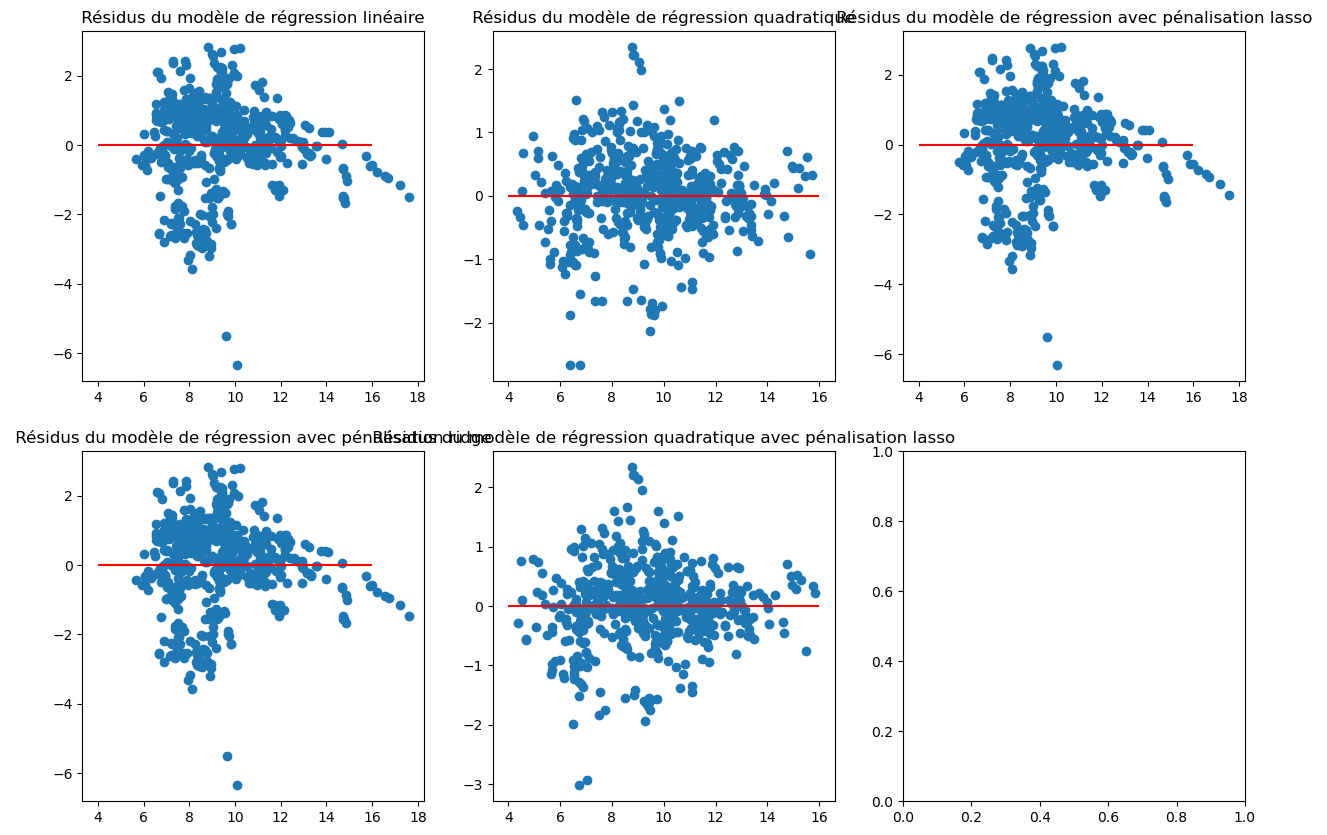

In [174]:
# ----- Comparaison des résidus ----- 
fig ,axs = plt.subplots(2,3, figsize=(15,10))

axs[0,0].scatter(CO2_pred_lin, residuals_lin)
axs[0,0].hlines(0,4,16,color="red")
axs[0,0].set_title(" Résidus du modèle de régression linéaire ")

axs[0,1].scatter(CO2_pred_2, residuals_lin_2)
axs[0,1].hlines(0,4,16,color="red")
axs[0,1].set_title(" Résidus du modèle de régression quadratique ")

axs[0,2].scatter(CO2_pred_lasso, residuals_lasso)
axs[0,2].hlines(0,4,16,color="red")
axs[0,2].set_title(" Résidus du modèle de régression avec pénalisation lasso ")

axs[1,0].scatter(CO2_pred_ridge, residuals_ridge)
axs[1,0].hlines(0,4,16,color="red")
axs[1,0].set_title(" Résidus du modèle de régression avec pénalisation ridge ")

axs[1,1].scatter(CO2_pred_lasso2, residuals_lasso2)
axs[1,1].hlines(0,4,16,color="red")
axs[1,1].set_title(" Résidus du modèle de régression quadratique avec pénalisation lasso ")


En regardant les résidus on ne voit pas beaucoup de différences entre les différents modèles. 

Pour conclure, les modèles de régréssion linéaire simple et de celui avec une pénalisation de Ridge sont les modèles qui expliquent le mieux nos données et qui sont le plus précis.

Text(0.5, 0, ' Valeurs Prédites ')

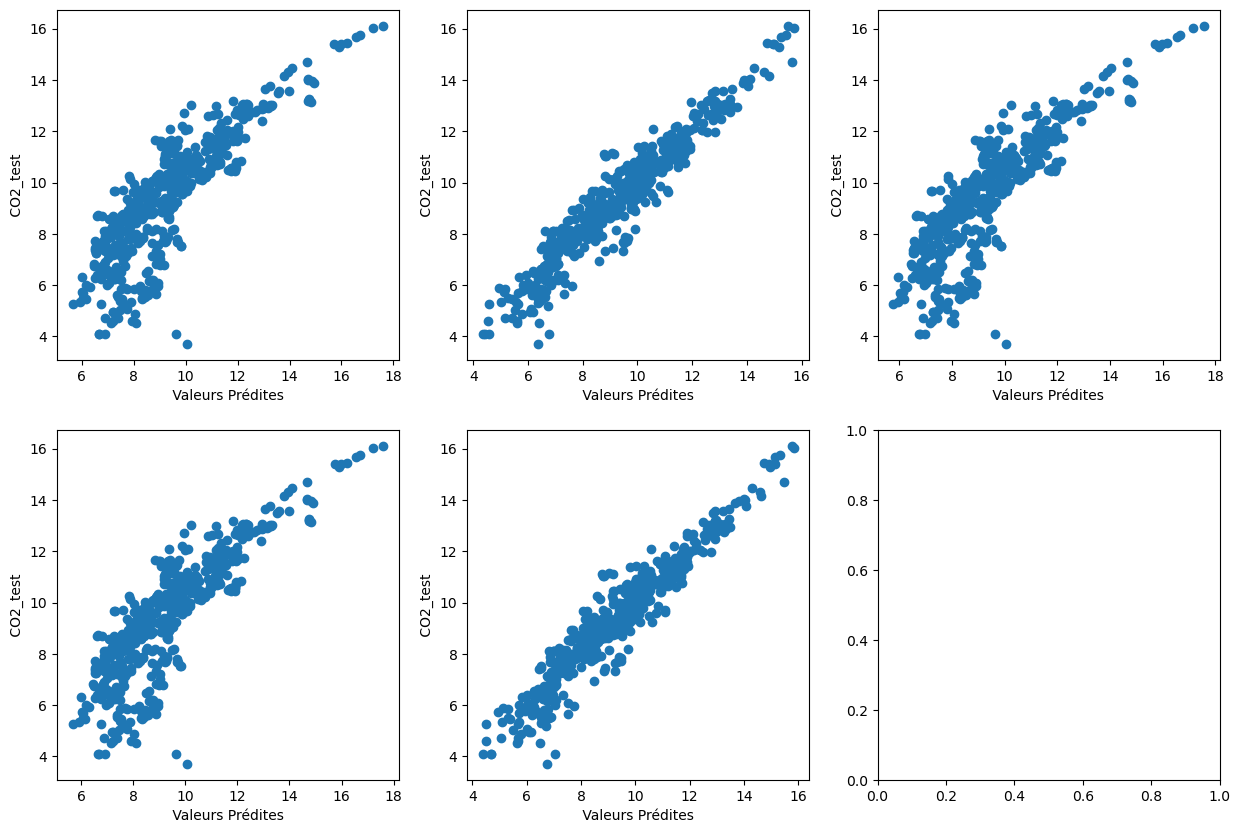

In [175]:
##### Autre potentiel code
fig ,axs = plt.subplots(2,3, figsize=(15,10))

axs[0,0].scatter(CO2_pred_lin, CO2_test)
axs[0,0].set_ylabel(" CO2_test ")
axs[0,0].set_xlabel(" Valeurs Prédites ")

axs[0,1].scatter(CO2_pred_2, CO2_test)
axs[0,1].set_ylabel(" CO2_test ")
axs[0,1].set_xlabel(" Valeurs Prédites ")

axs[0,2].scatter(CO2_pred_lasso, CO2_test)
axs[0,2].set_ylabel(" CO2_test ")
axs[0,2].set_xlabel(" Valeurs Prédites ")

axs[1,0].scatter(CO2_pred_ridge, CO2_test)
axs[1,0].set_ylabel(" CO2_test ")
axs[1,0].set_xlabel(" Valeurs Prédites ")

axs[1,1].scatter(CO2_pred_lasso2, CO2_test)
axs[1,1].set_ylabel(" CO2_test ")
axs[1,1].set_xlabel(" Valeurs Prédites ")

### 2) SVM Regression

Dans un modèle de régression SVR nous avons deux hyper pramètres possibles : C et epsilon. 
Le problème primal s'écrit : $\frac{1}{2}||w||^2 + C\sum_{1,..,n}{\epsilon_i}$.  C détermine la tolérance de mauvaises classifications. donc si C augmente, le nombre de mauvaises classification diminue et inversement. Ici, il est calibré par validation croisée. 
Epsilon ($\epsilon$) représente la tolérance autour des marges. On applique pas de pénalité à cete endroit-là.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


In [176]:
# print(np.arange(0.01, 0.06, 0.02))

In [177]:
# initialisation de la class 
svr = SVR()

# definition des paramètres
parameters = {'C': [16,18,25,30], 'epsilon': np.arange(0.005, 0.03, 0.01)}

# premier entrainement pour trouver les paramètres optimaux
svr_param = GridSearchCV(svr, parameters)
svr_param.fit(Xr_train, CO2_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [16, 18, 25, 30],
                         'epsilon': array([0.005, 0.015, 0.025])})

In [178]:
print("Meilleurs paramètres trouvés:", svr_param.best_params_)

Meilleurs paramètres trouvés: {'C': 30, 'epsilon': 0.015}


In [183]:
svr_best = SVR(C=svr_param.best_params_['C'], epsilon=svr_param.best_params_['epsilon'])
svr_best.fit(Xr_train, CO2_train)

SVR(C=30, epsilon=0.015)

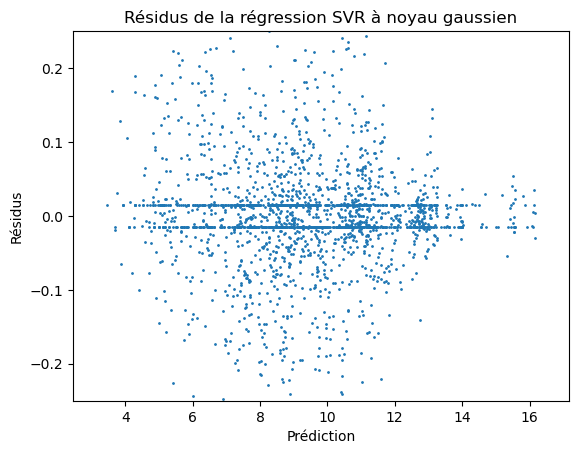

In [184]:
fit_svmr = svr_best.predict(Xr_train)

res_svmr = fit_svmr - CO2_train

# affichage des résidus
plt.scatter(fit_svmr, res_svmr, s=1)
plt.xlabel("Prédiction")
plt.ylabel("Résidus")
plt.title("Résidus de la régression SVR à noyau gaussien")
plt.xlim(min(fit_svmr) - 1, max(fit_svmr) + 1)
plt.ylim(-0.25,0.25)
plt.show()

## Forest CART

Dans les modèles d'arbres de régression, on cherche à optimiser la profondeur de l'arbre

In [185]:
from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,20)), "ccp_alpha":[0.001,0.003,0.01,0.02]}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, CO2_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.022581, Meilleur paramètre = {'ccp_alpha': 0.001, 'max_depth': 12}


In [186]:
best_index = np.argmin(treeOpt.cv_results_['mean_test_score'])

best_index_numeric = float(best_index)

best_model = treeOpt.best_estimator_

print("Meilleur score obtenu par CV = ", treeOpt.cv_results_['mean_test_score'][best_index])

Meilleur score obtenu par CV =  0.5471348903435179


In [187]:
# Estimation de l'erreur de prévision
print("Estimation de l'erreur de prévision : ",1-treeOpt.score(Xr_test,CO2_test))

Estimation de l'erreur de prévision :  0.023956468856202395


In [188]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(Xr_test)

In [189]:
from sklearn.metrics import confusion_matrix

pred_factor = (y_chap > 10).astype(int)

# Convertir les valeurs réelles en facteur (classes)
true_factor = (CO2_test > 10).astype(int)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(true_factor, pred_factor)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[323  11]
 [  8 232]]


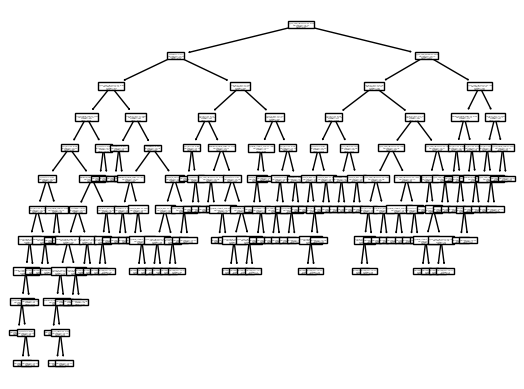

In [190]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG = best_model
treeG.fit(Xr_train,CO2_train)
plot_tree(treeG,feature_names=dataQuant.columns.tolist())
plt.show()
feature_names=dataQuant.columns.tolist()
# print("node 0 : ",feature_names[treeG.tree_.feature[0]]," <= ",treeG.tree_.threshold[0])

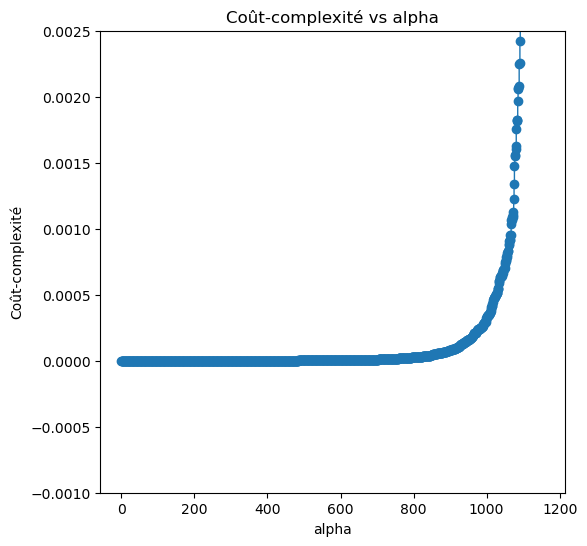

min des alphas =  1.5486982034875768e-18


In [191]:
# Calcul des coûts de complexité
ccp_alphas = treeG.cost_complexity_pruning_path(Xr_train, CO2_train)["ccp_alphas"]

plt.figure(figsize=(6, 6))
plt.plot(ccp_alphas, marker='o', drawstyle="steps-post",linewidth=1)
plt.xlabel("alpha")
plt.ylim(-0.001,0.0025)
plt.ylabel("Coût-complexité")
plt.title("Coût-complexité vs alpha")
plt.show()
print("min des alphas = ",min(ccp_alphas[1:]))

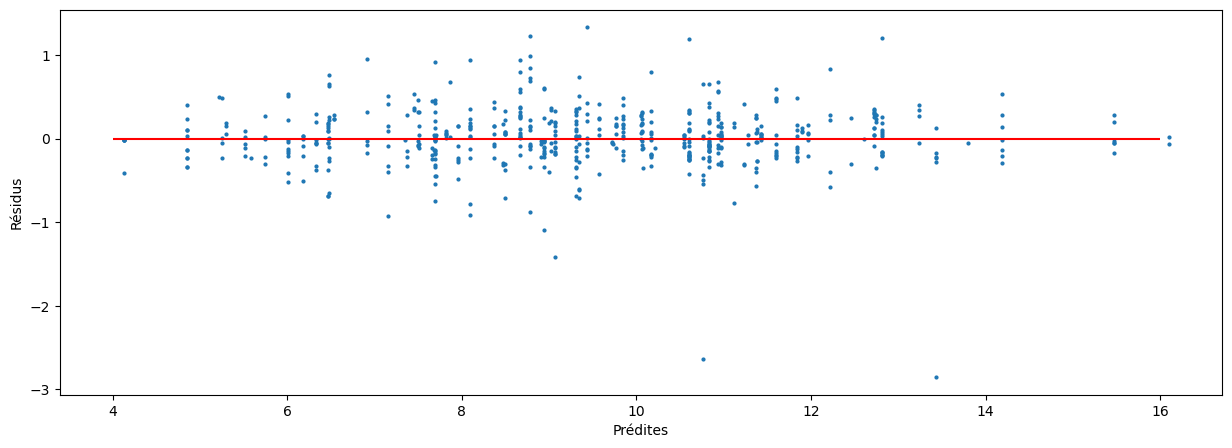

In [192]:
# Graphe des Résidus
prev_arbre=treeG.predict(Xr_test)

plt.figure(figsize=(15,5))
plt.plot(prev_arbre,CO2_test-prev_arbre,"o",markersize=2, linewidth = 0.01)
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,4,16,color="red")
plt.show()

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
   criterion='squared_error', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,CO2_train)
print("Erreur OOB : ",1-rfFit.oob_score_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Erreur OOB :  0.003654457016920687


In [61]:
# erreur de prévision sur le test
print("Erreur prévision Test : ",1-rfFit.score(Xr_test,CO2_test))

Erreur prévision Test :  0.005091573980978259


In [62]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, CO2_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.003870, Meilleur paramètre = {'max_features': 5}


In [63]:
# erreur de prévision sur le test
print("Erreur prévision Test : ",1-rfOpt.score(Xr_test,CO2_test))

Erreur prévision Test :  0.0029878190763562573


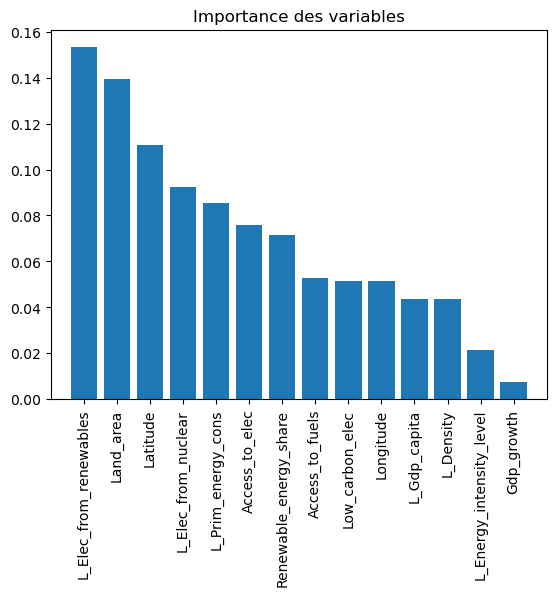

In [64]:
# Importance des variables dans mon modèle
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, CO2_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]

# Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(14), importances[indices])  
plt.xticks(range(14), dataQuant.columns[indices],rotation=90)  
plt.xlim([-1, 14])  
plt.show()

Text(0.5, 1.0, ' Résidus du modèle avec boosting ')

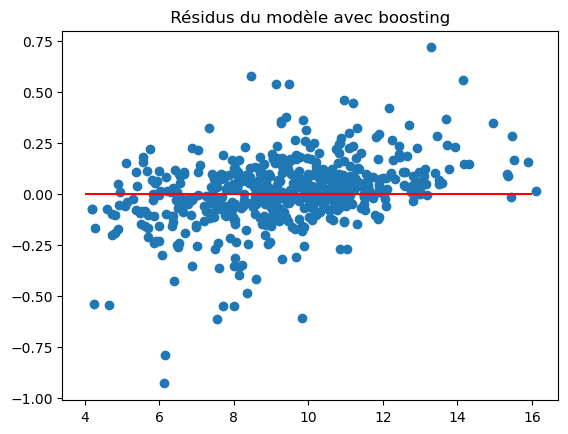

In [193]:
CO2_pred_rf = rfFit.predict(Xr_test)
residuals_rf = CO2_test - CO2_pred_rf

plt.scatter(CO2_pred_rf, residuals_rf)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle avec boosting ")

### Boosting

In [65]:
import lightgbm as lgb
from sklearn.model_selection import KFold

params = {
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': 31,
    'learning_rate': 0.03,
    'min_data_in_leaf': 5,
    'n_estimators':10000,
    'verbose': -1
}

boost_reg = lgb.LGBMRegressor(**params)

regOpt_boost = boost_reg.fit(Xr_train, CO2_train)

CO2_pred_boost = boost_reg.predict(Xr_test)

MSE_boost = mean_squared_error(CO2_test, CO2_pred_boost)
R2_boost = r2_score(CO2_test,CO2_pred_boost)

# Résidus :
residuals_boost = CO2_test - CO2_pred_boost

In [66]:
print("meilleur estimateur : ",regOpt_boost.n_estimators_)
print("nombre d'itérations réalisées : ",regOpt_boost.n_iter_)

meilleur estimateur :  10000
nombre d'itérations réalisées :  10000


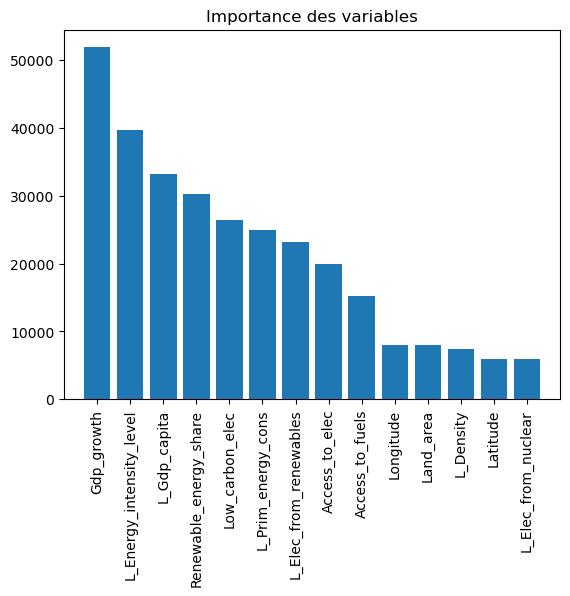

In [67]:
# Importance décroissante des variables
importances = regOpt_boost.feature_importances_
indices = np.argsort(importances)[::-1]

# Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(14), importances[indices])  
plt.xticks(range(14), dataQuant.columns[indices],rotation=90)  
plt.xlim([-1, 14])  
plt.show()

Text(0.5, 1.0, ' Résidus du modèle avec boosting ')

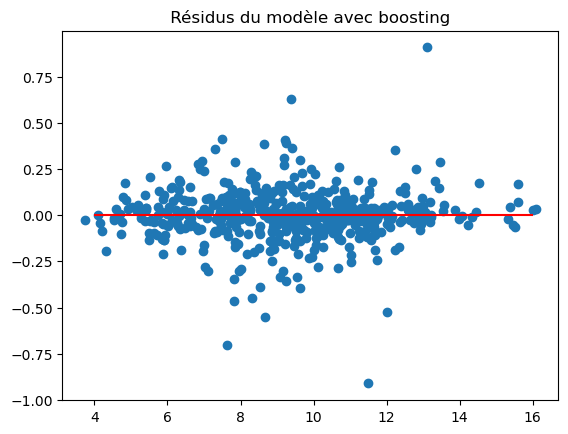

In [68]:
plt.scatter(CO2_pred_boost, residuals_boost)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle avec boosting ")

In [69]:
# erreur de prévision sur le test
print("Erreur prévision Test : ",1-regOpt_boost.score(Xr_test,CO2_test))

Erreur prévision Test :  0.003575823550069801


In [70]:
pred_factor = (CO2_pred_boost > 10).astype(int)

# Convertir les valeurs réelles en facteur (classes)
true_factor = (CO2_test > 10).astype(int)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(true_factor, pred_factor)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[326   8]
 [  5 235]]


### Réseau de neurones

In [78]:
from sklearn.neural_network import MLPRegressor

In [100]:
param_grid = {
    'hidden_layer_sizes': [(2,), (3,), (4,), (5,)],
    'alpha': [1, 2, 3]
}
# ,early_stopping=True
nnet = GridSearchCV(MLPRegressor(max_iter=1000,solver='sgd'), param_grid, cv=10, n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
nnetOpt = nnet.fit(Xr_train, CO2_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_score = 1. - nnetOpt.best_score_
best_size = nnetOpt.best_params_['hidden_layer_sizes']
best_decay = nnetOpt.best_params_['alpha']

# Entraîner le modèle avec les meilleurs hyperparamètres
best_nnet = MLPRegressor(hidden_layer_sizes=best_size, alpha=best_decay, max_iter=1000)
best_nnetOpt = best_nnet.fit(Xr_train, CO2_train)

print("Meilleur score = %f, Meilleur paramètre couches cahées = %s, meilleur paramètre alpha = %s" % (best_score, best_size, best_decay))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_netwo

Meilleur score = 0.117110, Meilleur paramètre couches cahées = (5,), meilleur paramètre alpha = 1


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [101]:
1-best_nnetOpt.score(Xr_test,CO2_test)

0.1626568275124154

In [102]:
# prévision de l'échantillon test
CO2_pred_nnet = best_nnetOpt.predict(Xr_test)
# matrice de confusion
pred_factor = (CO2_pred_nnet > 10).astype(int)

# Convertir les valeurs réelles en facteur (classes)
true_factor = (CO2_test > 10).astype(int)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(true_factor, pred_factor)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[320  14]
 [ 34 206]]


Text(0.5, 1.0, ' Résidus du modèle avec Réseau de Neurones ')

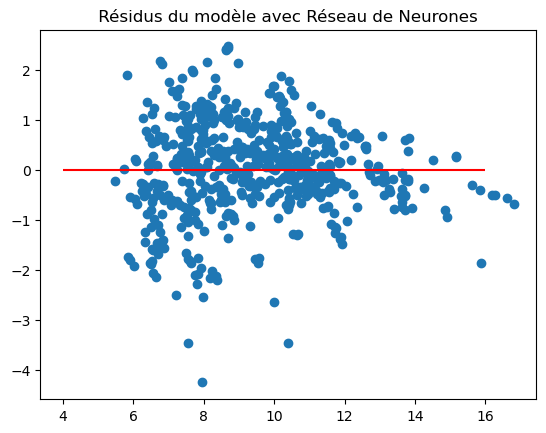

In [103]:
residuals_nnet = CO2_test - CO2_pred_nnet

plt.scatter(CO2_pred_nnet, residuals_nnet)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle avec Réseau de Neurones ")

In [104]:
MSE_nnet = mean_squared_error(CO2_test,CO2_pred_nnet)
R2_nnet = r2_score(CO2_test,CO2_pred_nnet)

print("MSE = ",MSE_nnet," et R2 = ",R2_nnet)

MSE =  0.8648915483216559  et R2 =  0.8373431724875846
